In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input

In [3]:
# import dataset and shuffle data
df = pd.read_csv('dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.095448,11.442836,35.572645,67.042390,94.240586,110.812601,119.320914,124.584922,129.088417,132.976309,...,113.186020,110.273237,109.193317,104.961184,92.071412,67.452229,37.637922,1.723408e+01,4,2.0
1,0.440746,0.315091,0.169764,0.094689,0.119278,0.255493,0.477718,0.661931,0.675483,0.592705,...,0.085404,0.038211,0.011750,0.002397,0.000317,0.000027,0.000000,0.000000e+00,5,2.0
2,0.073604,0.064425,0.049743,0.052001,0.119312,0.313192,0.636635,0.959341,1.136141,1.198248,...,0.307802,0.124227,0.035055,0.006975,0.001019,0.000109,0.000007,6.335147e-07,6,0.0
3,1.308015,1.522553,1.731482,1.831905,1.878827,2.023311,2.379037,2.841684,3.631972,6.761339,...,0.586579,0.294187,0.096563,0.023102,0.011657,0.018086,0.024437,2.608389e-02,3,1.0
4,1.724580,14.886900,41.632000,73.935268,98.940936,113.093967,122.295891,130.789434,137.736556,141.709877,...,102.025351,99.319171,97.087505,93.171929,82.210237,60.547918,33.819992,1.541394e+01,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,1.126382,1.362391,1.567422,1.568393,1.530160,1.787968,2.358146,2.729000,2.472579,1.990135,...,0.005517,0.000576,0.000028,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0,2.0
2671,0.435561,0.586224,0.759011,0.844549,0.898634,1.041470,1.285786,1.532437,1.633131,1.503527,...,1.897431,1.663121,1.526336,1.454986,1.378993,1.245169,1.099596,1.016118e+00,8,0.0
2672,0.478647,0.406235,0.307691,0.275389,0.446562,0.973432,1.847873,2.678550,2.990870,2.843234,...,0.027450,0.009091,0.002369,0.002462,0.006763,0.013471,0.018442,1.968473e-02,8,2.0
2673,0.024769,0.067134,0.218698,0.675186,1.773058,3.702581,5.952101,7.338364,7.262496,6.499097,...,0.134441,0.061338,0.027122,0.016430,0.021094,0.046647,0.091035,1.287616e-01,6,0.0


In [4]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 2000
test_split = 2500

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_labels = df.iloc[0:train_split, num_col-2:num_col]
val_labels = df.iloc[train_split:test_split, num_col-2:num_col]

test_data = df.iloc[test_split:,:num_col-2]
result = df.iloc[test_split:, num_col-3:num_col]


In [18]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

train_data = train_data.reshape(len(train_data), 64,32, 1)
val_data = val_data.reshape(len(val_data), 64,32, 1)

print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)


(2000, 64, 32, 1)
(2000, 2)
(500, 64, 32, 1)
(500, 2)


The image label is:  [3. 1.]


"plt.figure(figsize=(10,5))\ni = 0\n\nfor pressure_map, label in tf_train.take(5):\n    plt.subplot(1,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n\n    plt.imshow(pressure_map.numpy().reshape((64, 32)), cmap='gray')\n    plt.xlabel(label.numpy())\n    \n    i = i + 1\n"

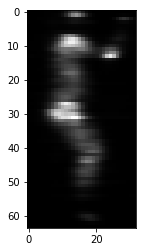

In [28]:
img = plt.imshow(train_data[3].reshape((64, 32)), cmap='gray')
print('The image label is: ', train_labels[3])

'''plt.figure(figsize=(10,5))
i = 0

for pressure_map, label in tf_train.take(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(pressure_map.numpy().reshape((64, 32)), cmap='gray')
    plt.xlabel(label.numpy())
    
    i = i + 1
'''

In [6]:
def preprocess_map(pressure_map, sub, pos):
    pressure_map = tf.reshape(pressure_map, [64, 32, 1])
    pressure_map = tf.cast(pressure_map, tf.float32) / 500.
    
    return pressure_map, sub, pos

tf_train = tf_train.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
tf_val = tf_val.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)

print(tf_train)
print(tf_val)


<ParallelMapDataset shapes: ((64, 32, 1), (1,), (1,)), types: (tf.float32, tf.int64, tf.float64)>
<ParallelMapDataset shapes: ((64, 32, 1), (1,), (1,)), types: (tf.float32, tf.int64, tf.float64)>


In [7]:
def pipeline(tf_data):
    tf_data = tf_data.shuffle(100)
    tf_data = tf_data.batch(1)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    
    return tf_data

tf_train = pipeline(tf_train)
tf_val = pipeline(tf_val)

print(tf_train)
print(tf_val)


<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1), (None, 1)), types: (tf.float32, tf.int64, tf.float64)>
<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1), (None, 1)), types: (tf.float32, tf.int64, tf.float64)>


In [8]:
'''model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 32, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Conv2D(16, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    
    Dropout(0.4),
    Dense(14, activation='softmax'),
    #Dense(4, activation='softmax'),
])'''

"model = Sequential([\n    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 32, 1)),\n    MaxPooling2D((2, 2)),\n    Dropout(0.4),\n    \n    Conv2D(16, (3, 3), activation='relu', padding='valid'),\n    MaxPooling2D((2, 2)),\n    Dropout(0.4),\n    \n    Flatten(),\n    Dense(120, activation='relu'),\n    Dense(84, activation='relu'),\n    \n    Dropout(0.4),\n    Dense(14, activation='softmax'),\n    #Dense(4, activation='softmax'),\n])"

In [19]:
inp = Input((64, 32, 1),)

x = Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 32, 1))(inp)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)
    
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)

x = Dropout(0.4)(x)

out = Dense(2, activation='sigmoid')(x)

out1 = Dense(14, activation='softmax')(out)
out2 = Dense(4, activation='softmax')(out)

model = Model(inp, [out1, out2])

In [20]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 64, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 64, 32, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 32, 16, 32)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 32, 16, 32)   0           max_pooling2d_6[0][0]            
____________________________________________________________________________________________

In [29]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1),
]


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [22]:
train_ = model.fit(tf_train, validation_data=tf_val, epochs=15, callbacks = callbacks)


ValueError: in converted code:

    /usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py:677 map_fn
        batch_size=None)
    /usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py:2469 _standardize_tensors
        exception_prefix='target')
    /usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_utils.py:539 standardize_input_data
        str(data)[:200] + '...')

    ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), for inputs ['dense_15', 'dense_16'] but instead got the following list of 1 arrays: [<tf.Tensor 'args_1:0' shape=(None, 1) dtype=int64>]...


In [ ]:
plt.plot(train_log.history['accuracy'], label='accuracy')
plt.plot(train_log.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print('Training accuracy: %f' % train_log.history['accuracy'][-1])
print('Validation accuracy: %f' % train_log.history['val_accuracy'][-1])

In [ ]:
tf_test_data = tf.data.Dataset.from_tensor_slices(([test_data.to_numpy().reshape(len(test_data), 64, 32, 1)]))

predictions = model.predict(tf_test_data)
predictions = np.argmax(predictions, axis=1)


In [ ]:
plt.figure(figsize=(10,5))

for i, row in test_data.head(20).reset_index(drop=True).iterrows():
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(row.values.reshape((64, 32)), cmap='gray')
    plt.xlabel(predictions[i])

test_data.head(10).reset_index(drop=True)


In [ ]:
result.head(20).reset_index(drop=True)